# DIGIT RECOGNIZER

In [ ]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

### PRÉPARATION DES DONNÉES

In [32]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # images 28x28 en niveaux de gris

# Normalisation entre 0 et 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

### AUGMENTATION DES DONNÉES

In [33]:
datagen = ImageDataGenerator(
    rotation_range=10,       # rotation aléatoire en degrés
    width_shift_range=0.1,   # translation horizontale (10% de la largeur)
    height_shift_range=0.1   # translation verticale (10% de la hauteur)
)

datagen.fit(X_train)

### CONSTRUCTION DES CNNS

In [ ]:
# 10 conv layers, filtres = 16 à 176, kernel=3×3, padding=valid, BatchNorm après chaque conv et softmax
def build_m3():
    model = models.Sequential()
    model.add(layers.Input(shape=(28,28,1)))
    for i in range(10):
        model.add(layers.Conv2D(16*(i+1), (3,3), activation='relu', padding='valid'))
        model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # type: ignore[attr-defined]
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 5 conv layers, filtres = 32 à 160, kernel=5×5, padding=valid, BatchNorm après chaque conv et softmax
def build_m5():
    model = models.Sequential()
    model.add(layers.Input(shape=(28,28,1)))
    for i in range(1,6):
        model.add(layers.Conv2D(32*i, (5,5), activation='relu', padding='valid'))
        model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.BatchNormalization())   
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # type: ignore[attr-defined]
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 4 conv layers, filtres = 48 à 192, kernel=7×7, padding=valid, BatchNorm après chaque conv et softmax
def build_m7():
    model = models.Sequential()
    model.add(layers.Input(shape=(28,28,1)))
    for i in range(1,5):
        model.add(layers.Conv2D(48*i, (7,7), activation='relu', padding='valid'))
        model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.BatchNormalization())   
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # type: ignore[attr-defined]
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_3 = build_m3()
cnn_5 = build_m5()
cnn_7 = build_m7()

### ENTRAINEMENT DES MODÈLES

In [ ]:
# paramètres
batch_size = 120
steps_per_epoch = len(X_train) // batch_size   # ça donnera environ 500

# callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True, verbose=1)

def lr_scheduler(epoch, lr):
    return lr * 0.98   # décroissance exponentielle

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)  # type: ignore[attr-defined]

In [36]:
print("Entraînement du CNN 3x3")
start = time.time()
history_3 = cnn_3.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
    epochs=150,
    steps_per_epoch=steps_per_epoch,
    validation_data=(X_test, y_test),
    callbacks=[lr_callback, early_stop],
    verbose=1
)
end = time.time()
print(f"Durée d'entraînement du CNN 3x3 : {(end - start):.2f} secondes")

Entraînement du CNN 3x3
Epoch 1/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - accuracy: 0.8382 - loss: 0.5931 - val_accuracy: 0.9462 - val_loss: 0.3017 - learning_rate: 9.8000e-04
Epoch 2/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.9624 - loss: 0.1745 - val_accuracy: 0.9668 - val_loss: 0.2031 - learning_rate: 9.6040e-04
Epoch 3/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.9723 - loss: 0.1429 - val_accuracy: 0.9705 - val_loss: 0.1306 - learning_rate: 9.4119e-04
Epoch 4/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.9751 - loss: 0.1277 - val_accuracy: 0.9867 - val_loss: 0.0566 - learning_rate: 9.2237e-04
Epoch 5/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.9784 - loss: 0.1109 - val_accuracy: 0.9713 - val_loss: 0.2775 - learning_rate: 9.0392e-04
Epoch 6/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.9795 - loss: 0.0913 - val_accuracy: 0.9852 - val_loss: 0.0668 - learning_rate: 8.8584e-04
Epoch 7/150
500/500 ━━

In [37]:
print("Entraînement du CNN 5x5")
start = time.time()
history_5 = cnn_5.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
    epochs=150,
    steps_per_epoch=steps_per_epoch,
    validation_data=(X_test, y_test),
    callbacks=[lr_callback, early_stop],
    verbose=1
)
end = time.time()
print(f"Durée d'entraînement du CNN 5x5 : {(end - start):.2f} secondes")

Entraînement du CNN 5x5
Epoch 1/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.8710 - loss: 0.4874 - val_accuracy: 0.7380 - val_loss: 1.1938 - learning_rate: 9.8000e-04
Epoch 2/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9657 - loss: 0.1582 - val_accuracy: 0.9644 - val_loss: 0.2138 - learning_rate: 9.6040e-04
Epoch 3/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9744 - loss: 0.1259 - val_accuracy: 0.9875 - val_loss: 0.0570 - learning_rate: 9.4119e-04
Epoch 4/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9816 - loss: 0.0875 - val_accuracy: 0.9864 - val_loss: 0.0710 - learning_rate: 9.2237e-04
Epoch 5/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9829 - loss: 0.0794 - val_accuracy: 0.9896 - val_loss: 0.0452 - learning_rate: 9.0392e-04
Epoch 6/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9833 - loss: 0.0774 - val_accuracy: 0.9814 - val_loss: 0.1014 - learning_rate: 8.8584e-04
Epoch 7/150
500/500 ━━

In [38]:
print("Entraînement du CNN 7x7")
start = time.time()
history_7 = cnn_7.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
    epochs=150,
    steps_per_epoch=steps_per_epoch,
    validation_data=(X_test, y_test),
    callbacks=[lr_callback, early_stop],
    verbose=1
)
end = time.time()
print(f"Durée d'entraînement du CNN 7x7 : {(end - start):.2f} secondes")

Entraînement du CNN 7x7
Epoch 1/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.8762 - loss: 0.4240 - val_accuracy: 0.9570 - val_loss: 0.1476 - learning_rate: 9.8000e-04
Epoch 2/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9752 - loss: 0.0857 - val_accuracy: 0.9856 - val_loss: 0.0499 - learning_rate: 9.6040e-04
Epoch 3/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9799 - loss: 0.0695 - val_accuracy: 0.9856 - val_loss: 0.0611 - learning_rate: 9.4119e-04
Epoch 4/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9831 - loss: 0.0576 - val_accuracy: 0.9899 - val_loss: 0.0347 - learning_rate: 9.2237e-04
Epoch 5/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9858 - loss: 0.0500 - val_accuracy: 0.9881 - val_loss: 0.0457 - learning_rate: 9.0392e-04
Epoch 6/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9867 - loss: 0.0447 - val_accuracy: 0.9913 - val_loss: 0.0360 - learning_rate: 8.8584e-04
Epoch 7/150
500/500 ━━

### ÉVALUATION DES PERFORMANCES

In [39]:
# Prédictions
preds_3 = cnn_3.predict(X_test)
preds_5 = cnn_5.predict(X_test)
preds_7 = cnn_7.predict(X_test)
ensemble_preds = (preds_3 + preds_5 + preds_7) / 3

# Accuracy
acc_3 = cnn_3.evaluate(X_test, y_test, verbose=0)[1]
acc_5 = cnn_5.evaluate(X_test, y_test, verbose=0)[1]
acc_7 = cnn_7.evaluate(X_test, y_test, verbose=0)[1]
ensemble_accuracy = np.mean(np.argmax(ensemble_preds, axis=1) == y_test)

print(f"Accuracy CNN 3x3 : {acc_3*100:.2f}%")
print(f"Accuracy CNN 5x5 : {acc_5*100:.2f}%")
print(f"Accuracy CNN 7x7 : {acc_7*100:.2f}%")
print(f"Accuracy Ensemble : {ensemble_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Accuracy CNN 3x3 : 99.57%
Accuracy CNN 5x5 : 99.46%
Accuracy CNN 7x7 : 99.60%
Accuracy Ensemble : 99.71%


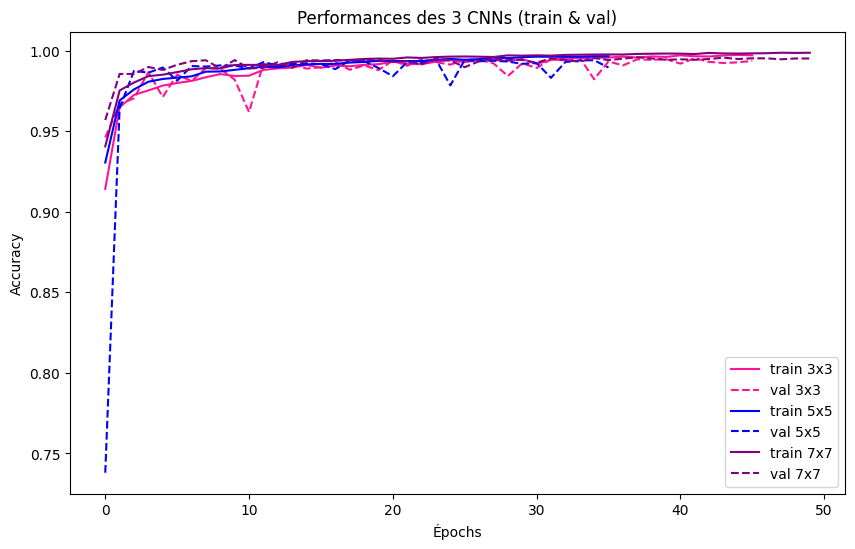

In [40]:
plt.figure(figsize=(10,6))
colors = {
    "3x3": "deeppink",
    "5x5": "blue",
    "7x7": "purple"
}
# CNN 3x3
plt.plot(history_3.history['accuracy'], label='train 3x3', color=colors["3x3"], linestyle='-')
plt.plot(history_3.history['val_accuracy'], label='val 3x3', color=colors["3x3"], linestyle='--')
# CNN 5x5
plt.plot(history_5.history['accuracy'], label='train 5x5', color=colors["5x5"], linestyle='-')
plt.plot(history_5.history['val_accuracy'], label='val 5x5', color=colors["5x5"], linestyle='--')
# CNN 7x7
plt.plot(history_7.history['accuracy'], label='train 7x7', color=colors["7x7"], linestyle='-')
plt.plot(history_7.history['val_accuracy'], label='val 7x7', color=colors["7x7"], linestyle='--')

plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Performances des 3 CNNs (train & val)")
plt.show()

In [41]:
def plot_conf_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_test, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

    fig, ax = plt.subplots(figsize=(8,8))
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    plt.title(title)
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


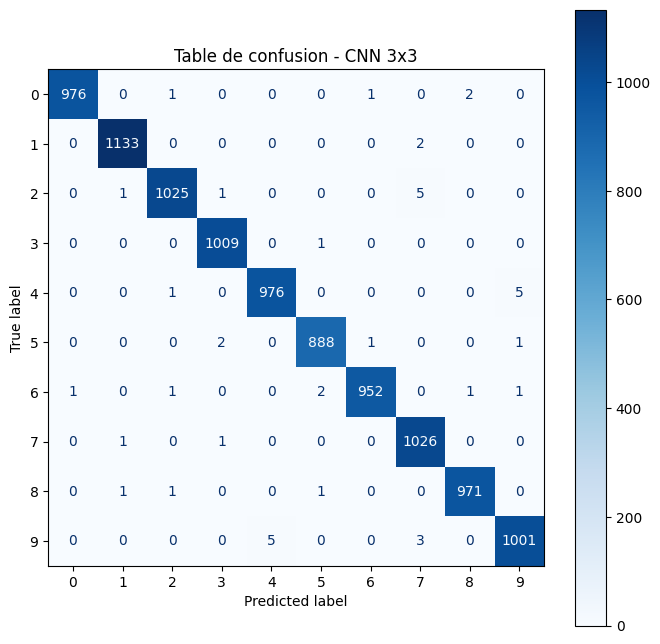

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


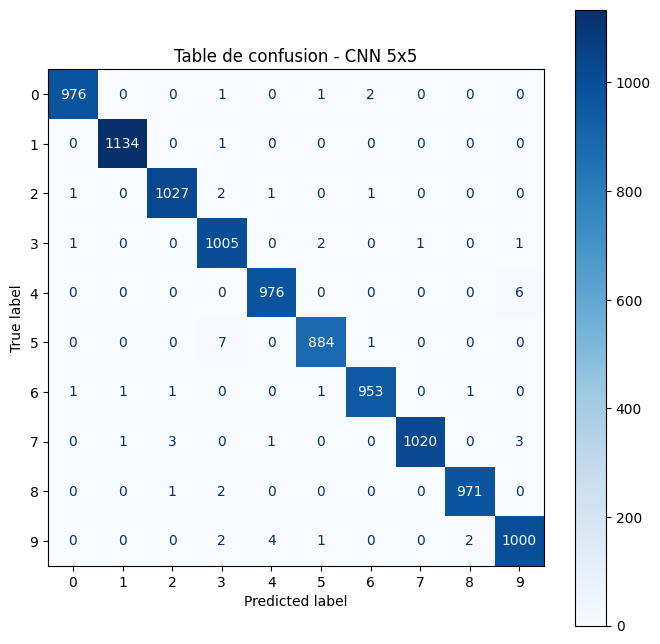

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


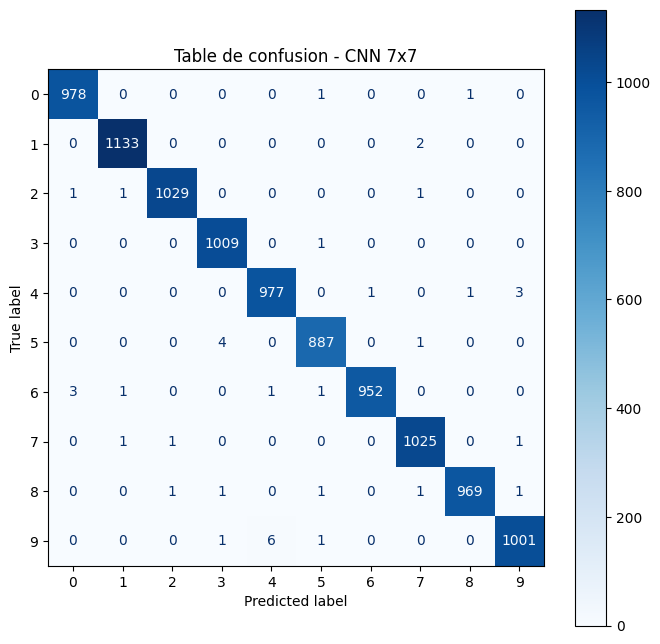

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


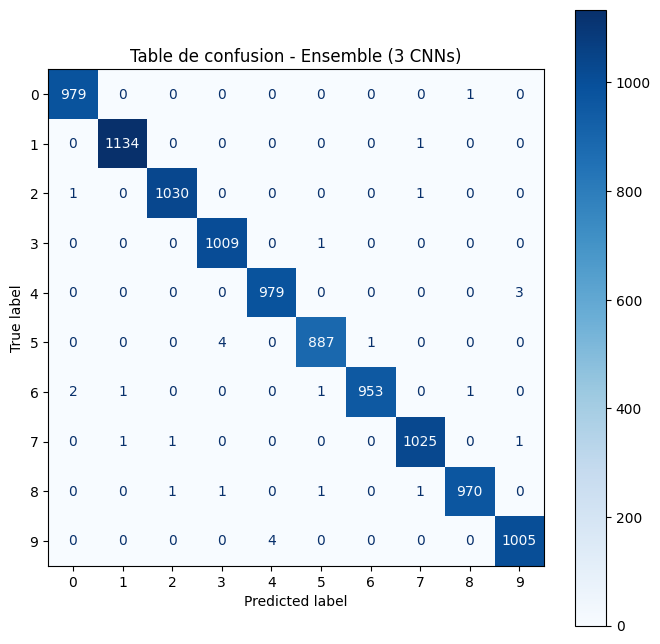

In [42]:
# CNN 3x3
plot_conf_matrix(cnn_3, X_test, y_test, "Table de confusion - CNN 3x3")
# CNN 5x5
plot_conf_matrix(cnn_5, X_test, y_test, "Table de confusion - CNN 5x5")
# CNN 7x7
plot_conf_matrix(cnn_7, X_test, y_test, "Table de confusion - CNN 7x7")
# Ensemble
ensemble_preds = (cnn_3.predict(X_test) + cnn_5.predict(X_test) + cnn_7.predict(X_test)) / 3
ensemble_classes = np.argmax(ensemble_preds, axis=1)

cm = confusion_matrix(y_test, ensemble_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Table de confusion - Ensemble (3 CNNs)")
plt.show()

SAUVEGARDE DU MODÈLE

In [43]:
# sauvegarde des modèles individuellement
for acc, model, name in [(acc_3, cnn_3, "3x3"),
                         (acc_5, cnn_5, "5x5"),
                         (acc_7, cnn_7, "7x7")]:
    accuracy_percent = int(acc * 10000) / 100
    filename = f"Model-{name}-{accuracy_percent:.2f}.keras"
    model.save(filename)
    print(f"Modèle sauvegardé sous '{filename}'")

Modèle sauvegardé sous 'Model-3x3-99.57.keras'
Modèle sauvegardé sous 'Model-5x5-99.45.keras'
Modèle sauvegardé sous 'Model-7x7-99.59.keras'
